Careful, these constants may be different for you:

In [1]:
DATA_PATH = '~/Desktop/honours/sdss_dr7_photometry_source.csv.gz'

Import all the things.

In [2]:
import mclearn.viz
import numpy as np
import pandas as pd

%matplotlib inline

Importing data.

In [3]:
def load_data(data_cols=('ra', 'dec', 'redshift'),
              filter_col='class',
              filter_val='Galaxy'):
    
    data_cols = list(data_cols)
    
    data_iter = pd.read_csv(
        DATA_PATH,
        iterator=True,
        chunksize=100000,
        usecols=data_cols + [filter_col])
    
    if filter_col is None:
        # Filtering disabled
        data = pd.concat(data_iter)
    else:
        # Filter out anything that is not a galaxy without loading the whole file into memory.
        data = pd.concat(chunk[chunk[filter_col] == filter_val]
                         for chunk in data_iter)

    return data


data = load_data()

Plotting.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


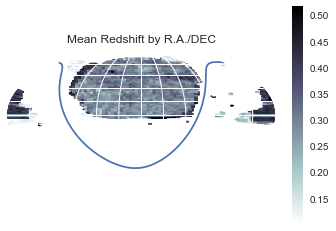

In [4]:
def plot(data):
    ra = data['ra']
    dec = data['dec']
    redshift = data['redshift']
    
    assert ra.shape == dec.shape == redshift.shape
    
    mclearn.viz.plot_hex_map(
        ra,
        dec,
        C=redshift,
        vmin=np.mean(redshift) - np.std(redshift),
        vmax=np.mean(redshift) + np.std(redshift),
        title='Mean Redshift by R.A./DEC')
    

plot(data)